In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split

In [3]:
df = pd.read_csv("Mammograph.csv")
df = pd.read_csv("mammograph.csv",skipinitialspace=True)
df["label"] = df.Severity
df = df.drop("Severity", axis=1)
df = df.drop("BI-RADS_assessment", axis=1) #Removed -- Non predictive


column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names
df.head()

,Age,Shape,Margin,Density,label
0,67,3,5,3,1
1,43,1,1,?,1
2,58,4,5,3,1
3,28,1,1,3,0
4,74,1,5,?,1


In [4]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

In [5]:
train_df.head(2)

,Age,Shape,Margin,Density,label
0,67,3,5,3,1
2,58,4,5,3,1


In [6]:
test_df.head(2)

,Age,Shape,Margin,Density,label
864,55,4,4,3,1
394,34,?,?,4,0


In [34]:
tic=timeit.default_timer()
accuracies = []
x=range(5,25)
#x=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
for i in x:
    tree = decision_tree_algorithm(train_df, min_samples=i)
    y_pred = decision_tree_predictions(test_df,tree)
    accuracies.append(accuracy_score(test_df.label,y_pred))
toc=timeit.default_timer()
print(toc - tic)    


2.5934985880001022


In [35]:
column_name=["Accuracies"]
df_result = pd.DataFrame({'Accuracies':accuracies})

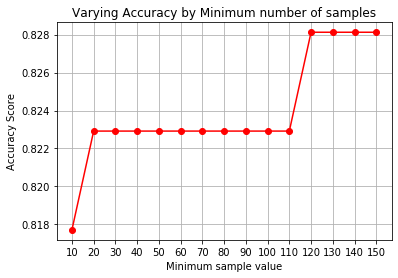

In [36]:
#sns.distplot(x=range(1,21),y=df_accuracies['Accuracies'], bins = 20)
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Minimum sample value')
plt.ylabel('Accuracy Score')
plt.title('Varying Accuracy by Minimum number of samples')
plt.grid(True)
plt.xticks(x)
plt.show()


